In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sigma = 0.1  # Standard deviation.
k = 0.5
beta = 1.
rho1 = 0.5
rho2 = 1 - rho1
tau = 0.2  # Time constant.

In [11]:
dt = .001  # Time step.
T = 4.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

reps = 10

In [12]:
sigma_bis = sigma * np.sqrt(1. / tau)
sqrtdt = np.sqrt(dt)

In [13]:
x1s = np.zeros((n,reps))
x2s = np.zeros((n,reps))
x1 = np.zeros(n)
x2 = np.zeros(n)

In [14]:
for rep in range(reps):
    x1 = np.zeros(n)
    x2 = np.zeros(n)
    for i in range(n - 1):
        x1[i + 1] = x1[i] + dt * ((rho1 - k * x1[i] - beta * x2[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x2[i + 1] = x2[i] + dt * ((rho2 - k * x2[i] - beta * x1[i]) / tau) + sigma_bis * sqrtdt * np.random.randn()
        x1[i + 1] = 0 if x1[i + 1] < 0 else x1[i + 1]
        x2[i + 1] = 0 if x2[i + 1] < 0 else x2[i + 1]
        
        x1s[:,rep] = x1
        x2s[:,rep] = x2

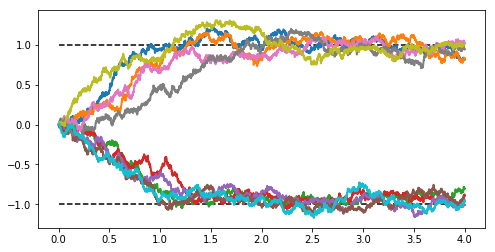

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x1s-x2s, lw=2)
ax.hlines(1, 0, T, linestyles='dashed')
ax.hlines(-1, 0, T, linestyles='dashed')

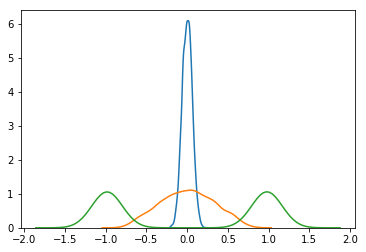

In [16]:
ntrials = 10000
X1 = np.zeros(ntrials)
X2 = np.zeros(ntrials)
for i in range(n):
    # We update the process independently for all trials
    X1 += (dt * ((rho1 - k * X1 - beta * X2) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
    X2 += (dt * ((rho2 - k * X2 - beta * X1) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials))
    X1[np.where(X1 < 0)[0]] = 0
    X2[np.where(X2 < 0)[0]] = 0
    # We display the histogram for a few points in
    # time
    if i in (0.01*T/dt, 0.1*T/dt, 0.99*T/dt):
        sns.distplot(X1-X2, bins=20, hist=False, norm_hist=True)